# 손글씨 출력하기

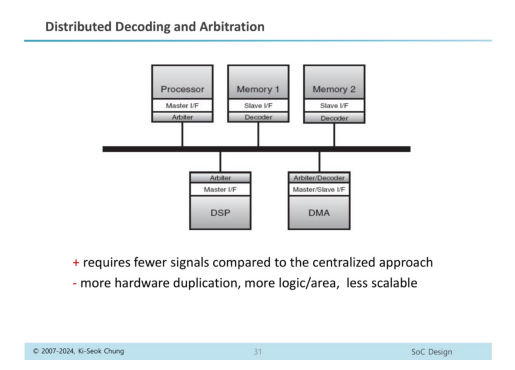

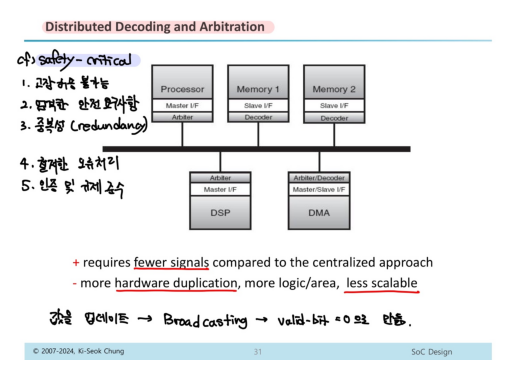

In [1]:
# Read Original JPEG and Handwrite JPEG
## Import part
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read Original JPEG and Handwrite JPEG
original = cv2.imread('Compare/new_compare_original.jpg')
handwrite = cv2.imread('Compare/new_compare_handwrite.jpg')

def imshow(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Convert BGR to RGB
ori = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
hw = cv2.cvtColor(handwrite, cv2.COLOR_BGR2RGB)

imshow(ori)
imshow(hw)

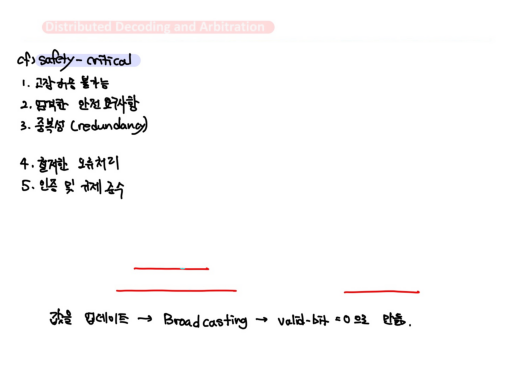

In [2]:
diff = cv2.bitwise_not(cv2.absdiff(original, handwrite))
diff_rgb = cv2.cvtColor(diff, cv2.COLOR_BGR2RGB)
imshow(diff_rgb)

## CV2

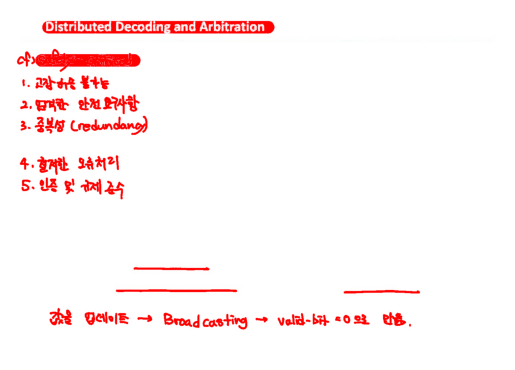

In [60]:
new_color = (0, 0, 255) # red


height, width, channels = diff.shape

#Generate new Image
new_img = np.zeros((height, width, channels), np.uint8)

for y in range(height):
    for x in range(width):
        if all(diff[y][x] > 225):
            new_img[y][x] = diff[y][x]
        else:
            new_img[y][x] = new_color

new_img_rgb = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
imshow(new_img_rgb)

## numpy

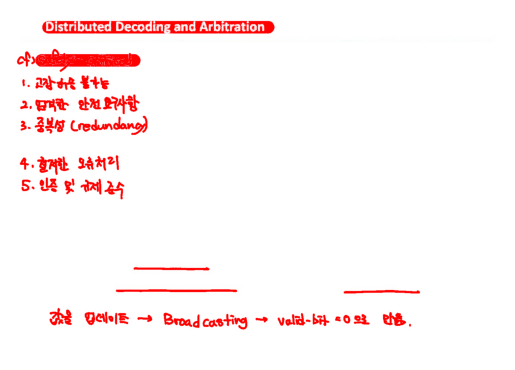

In [3]:
new_color = (255, 0, 0)

new_img = np.zeros_like(diff_rgb)

condition = (diff_rgb > 225).all(axis=2)

new_img[condition] = diff_rgb[condition]
new_img[~condition] = new_color

imshow(new_img)

In [6]:
import os
os.getcwd()

save_DIR = 'Result'
if not os.path.exists(save_DIR):
    os.makedirs(save_DIR)

new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)

name = input('Enter the name of the file: ')
cv2.imwrite(f'{save_DIR}/{name}.jpg', new_img)

True